<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [14]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv(r"D:\DMPracticals\Loan payments data.csv")
df.head()

,Loan_ID,loan_status,loan,terms,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,12000,30,10-07-2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,13000,30,10-07-2016,10-07-2016 09:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,25000,30,10-07-2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,25500,15,9/22/2016,9/22/2016 20:00,NaN,22,college,male
4,xqd20160005,PAIDOFF,62000,30,10-08-2016,9/23/2016 21:36,NaN,28,college,female


Text(0, 0.5, 'loan')

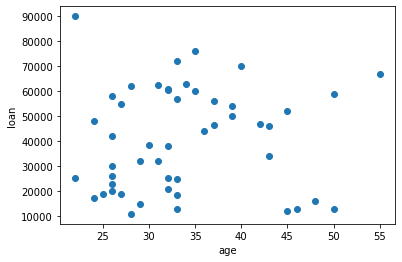

In [37]:
plt.scatter(df.age,df['loan'])
plt.xlabel('age')
plt.ylabel('loan')

In [38]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','loan'])
y_predicted

array([2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 2])

In [39]:
df['cluster']=y_predicted
df.head()

,Loan_ID,loan_status,loan,terms,due_date,paid_off_time,past_due_days,age,education,Gender,cluster
0,xqd20166231,PAIDOFF,12000,30,10-07-2016,9/14/2016 19:31,NaN,45,High School or Below,male,2
1,xqd20168902,PAIDOFF,13000,30,10-07-2016,10-07-2016 09:00,NaN,50,Bechalor,female,2
2,xqd20160003,PAIDOFF,25000,30,10-07-2016,9/25/2016 16:58,NaN,33,Bechalor,female,2
3,xqd20160004,PAIDOFF,25500,15,9/22/2016,9/22/2016 20:00,NaN,22,college,male,2
4,xqd20160005,PAIDOFF,62000,30,10-08-2016,9/23/2016 21:36,NaN,28,college,female,1


In [40]:
km.cluster_centers_

array([[3.36923077e+01, 4.06153846e+04],
       [3.52222222e+01, 6.30555556e+04],
       [3.25000000e+01, 1.85000000e+04]])

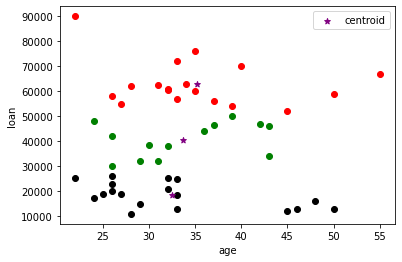

In [43]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['loan'],color='green')
plt.scatter(df2.age,df2['loan'],color='red')
plt.scatter(df3.age,df3['loan'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('loan')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [44]:
scaler = MinMaxScaler()

scaler.fit(df[['loan']])
df['loan'] = scaler.transform(df[['loan']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

In [46]:
df.head()

,Loan_ID,loan_status,loan,terms,due_date,paid_off_time,past_due_days,age,education,Gender,cluster
0,xqd20166231,PAIDOFF,0.012658,30,10-07-2016,9/14/2016 19:31,NaN,0.696970,High School or Below,male,2
1,xqd20168902,PAIDOFF,0.025316,30,10-07-2016,10-07-2016 09:00,NaN,0.848485,Bechalor,female,2
2,xqd20160003,PAIDOFF,0.177215,30,10-07-2016,9/25/2016 16:58,NaN,0.333333,Bechalor,female,2
3,xqd20160004,PAIDOFF,0.183544,15,9/22/2016,9/22/2016 20:00,NaN,0.000000,college,male,2
4,xqd20160005,PAIDOFF,0.645570,30,10-08-2016,9/23/2016 21:36,NaN,0.181818,college,female,1


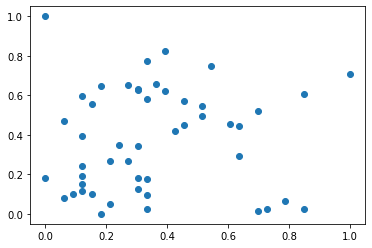

In [47]:
plt.scatter(df.age,df['loan'])

In [48]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','loan']])
y_predicted

array([2, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0,
       1, 1, 1, 1, 0])

In [49]:
df['cluster']=y_predicted
df.head()

,Loan_ID,loan_status,loan,terms,due_date,paid_off_time,past_due_days,age,education,Gender,cluster
0,xqd20166231,PAIDOFF,0.012658,30,10-07-2016,9/14/2016 19:31,NaN,0.696970,High School or Below,male,2
1,xqd20168902,PAIDOFF,0.025316,30,10-07-2016,10-07-2016 09:00,NaN,0.848485,Bechalor,female,2
2,xqd20160003,PAIDOFF,0.177215,30,10-07-2016,9/25/2016 16:58,NaN,0.333333,Bechalor,female,0
3,xqd20160004,PAIDOFF,0.183544,15,9/22/2016,9/22/2016 20:00,NaN,0.000000,college,male,0
4,xqd20160005,PAIDOFF,0.645570,30,10-08-2016,9/23/2016 21:36,NaN,0.181818,college,female,1


In [50]:
km.cluster_centers_

array([[0.1969697 , 0.17183544],
       [0.32216906, 0.62391739],
       [0.74848485, 0.31518987]])

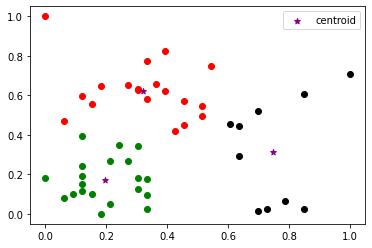

In [52]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['loan'],color='green')
plt.scatter(df2.age,df2['loan'],color='red')
plt.scatter(df3.age,df3['loan'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [53]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','loan']])
    sse.append(km.inertia_)

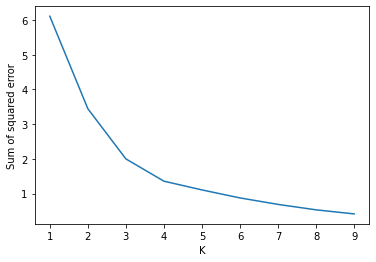

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of Squarded error')
plt.plot(k_rng,sse)